In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv(r'C:\Users\ASUS\Desktop\At Tumkur\water_potability  CE.csv')

# Features and target variable
X = data[['ph', 'Hardness', 'Solids', 'Conductivity', 'Turbidity']]
y = data['Potability']


In [4]:
print(data.head())

         ph    Hardness       Solids  Conductivity  Turbidity  Potability
0       NaN  204.890456  20791.31898    564.308654   2.963135           0
1  3.716080  129.422921  18630.05786    592.885359   4.500656           0
2  8.099124  224.236259  19909.54173    418.606213   3.055934           0
3  8.316766  214.373394  22018.41744    363.266516   4.628771           0
4  9.092223  181.101509  17978.98634    398.410813   4.075075           0


In [3]:
# Handling missing data
X = X.fillna(X.mean())

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best estimator
best_rf_classifier = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [6]:
# Make predictions
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print(f"F1 Score: {f1:.2f}")


Accuracy: 61.28%
Confusion Matrix:
 [[369  43]
 [211  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.90      0.74       412
           1       0.43      0.14      0.21       244

    accuracy                           0.61       656
   macro avg       0.54      0.52      0.48       656
weighted avg       0.56      0.61      0.54       656

F1 Score: 0.21


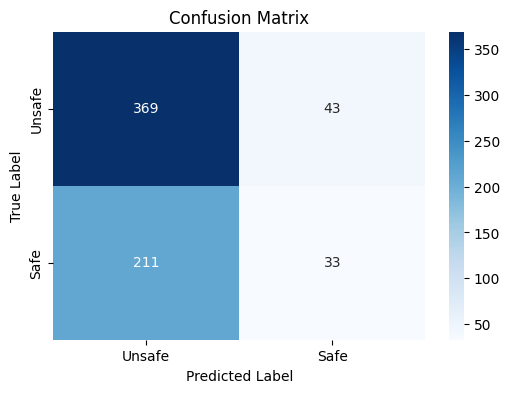

In [7]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Unsafe', 'Safe'], yticklabels=['Unsafe', 'Safe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
